# Simulacion - 75.26
## TP1 - Xorshift RNGs
### Grupo 4 
### Integrantes: Joaquín Rivero, Juan Pablo Aschieri, Diego Civini, Francisco Rovira Rossel

In [19]:
import matplotlib.pyplot as plt

## Ejercicio 1

Hacemos una clase `xorshift_generator` que dada una semilla devuelve un generador de numeros aleatorios de 32 bits realizando operaciones logicas de shifteo y xor. Los valores usados para la cantidad de shifteos fueron sacados del paper.

In [20]:
class xorshift_generator:
    def __init__(self, seed):
        self.x = seed
        self.y = 463820370
        self.z = 138409373
        self.w = 12872349


    def rand(self):
        tmp = ( self.x^ (self.x <<13) ) 
        self.x = self.y
        self.y = self.z
        self.z = self.w
        self.w = (self.w^(self.w>>17) ) ^ (tmp^(tmp>>5))
        return self.w & 0xffffffff
    
    def normalized_rand(self):
        return self.rand() / (2**32 -1)

Obtenemos un generador con una semilla y obtenemos 100000 numeros para analizar los resultados.

In [21]:
generator = xorshift_generator(123456789)

In [36]:
rand_numers = []
for i in range(100000):
    rand_numers.append(generator.rand())
print(rand_numers[:5])

[766200517, 1934109686, 840266027, 3415840300, 3097790067]


Graficamos los numeros en un histograma para obtener una representacion visual aproximada de su distribucion. Como buscamos numeros aleatorios entre 0 y 2^32 -1 deberia ser un grafico similar a una dist uniforme ente 0 y 2^32 -1

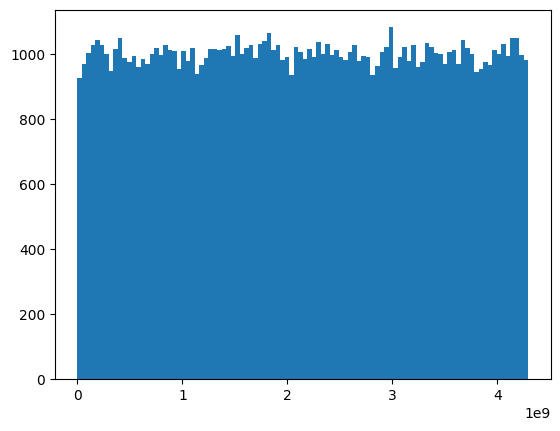

In [37]:
plt.hist(rand_numers, bins = 100)
plt.show()

Si bien no es perfecto se puede ver como aproximadamente los distintos box tienen la misma cantidad de ocurrencias, haciendo que el grafico dado se paresca a una meseta, que es el grafico que deberia tener una uniforme.

Si queremos obtener numero aleatorios entre 0 y 1 utilizando el xorshift generator, basta con generar un numero aleatorio de la misma manera y luego normalizarlo. Para ello dividimos al numero por el mayor valor posible, 2^32 -1. De esta manera optenemos un numero aleatorio entre 0 y 1 con el metodo normalized_rand

In [38]:
rand_numbers_normalized = []
for i in range(100000):
    rand_numbers_normalized.append(generator.normalized_rand())
print(rand_numbers_normalized[:5])

[0.4177938493475769, 0.51161216234593, 0.8245237941910801, 0.3845214700290285, 0.45587373512235324]


De la misma forma graficamos un histograma para ver si la distribucion de los numeros se asemeja a una distribucion uniforme entre 0 y 1.

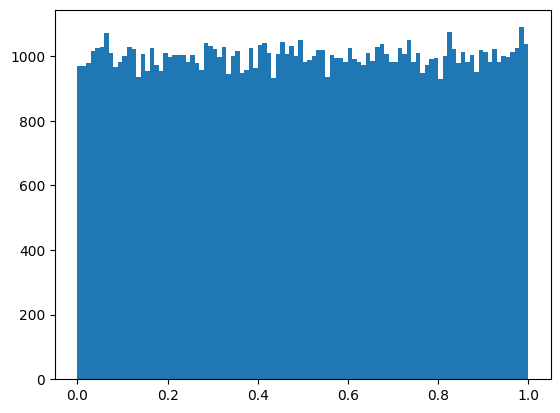

In [41]:
plt.hist(rand_numbers_normalized, bins = 100)
plt.show()

## Ejercicio 2

enunciado

### Test chi2


Si bien el test dela chi2 necesita que la dist sea discreta, lo cual presenta un problema ya que nosotros tenemos una uniforme continua. Sin embargo para poder realizar este test, podemos discretizar la distribucion juntando valores de intervalos en bins

Tomo como ho que la dist es uniforme, 

In [126]:
from scipy.stats import chi2

In [127]:
def get_frequency(rand_numbers, bins, max):
    frequency = [0 for i in range(bins)]

    for i in rand_numbers:
        frequency[i // int(max/bins)] += 1
    return frequency
        

In [131]:
def test_chi2_for_uniform_distribution(rand_numbers, bins, max, significance_level):
    frequency = get_frequency(rand_numbers, bins, max)

    expected_frecuency = len(rand_numbers)/bins
    aux = 0
    for i in frequency:
        print("i",i)
        print("expected",expected_frecuency)
        aux += (i - expected_frecuency)**2
    d2 = aux/expected_frecuency

    upper_limit = chi2.ppf(1 - significance_level, df=bins-1)

    print(d2)
    print(upper_limit)
    if d2 <= upper_limit:
        print("hay suf evidencia para rechazar h0")
    else:
        print("no hay suf evidencia para rechazar h0")

In [129]:
generator = xorshift_generator(55555555)
lista =[]


In [130]:
for i in range(100000):
    lista.append(generator.rand())

KeyboardInterrupt: 

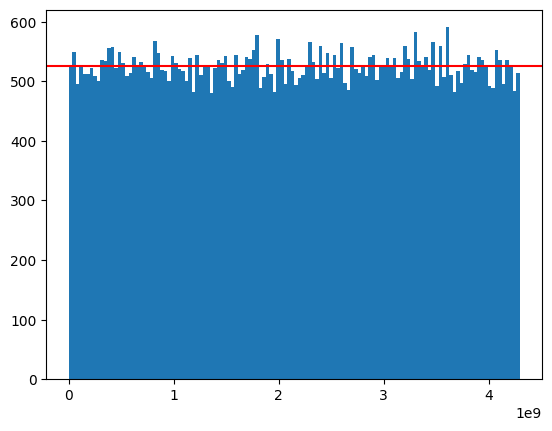

In [135]:
plt.hist(lista, bins = 2**7)
plt.axhline(y=len(lista)/2**7, color = 'red')
plt.show()

In [132]:
test_chi2_for_uniform_distribution(lista, 100, 2**32 - 1, 0.05)

i 684
expected 671.94
i 668
expected 671.94
i 656
expected 671.94
i 650
expected 671.94
i 665
expected 671.94
i 674
expected 671.94
i 628
expected 671.94
i 682
expected 671.94
i 704
expected 671.94
i 724
expected 671.94
i 672
expected 671.94
i 705
expected 671.94
i 648
expected 671.94
i 649
expected 671.94
i 709
expected 671.94
i 665
expected 671.94
i 682
expected 671.94
i 653
expected 671.94
i 676
expected 671.94
i 746
expected 671.94
i 629
expected 671.94
i 667
expected 671.94
i 667
expected 671.94
i 699
expected 671.94
i 654
expected 671.94
i 652
expected 671.94
i 629
expected 671.94
i 665
expected 671.94
i 698
expected 671.94
i 658
expected 671.94
i 670
expected 671.94
i 632
expected 671.94
i 661
expected 671.94
i 690
expected 671.94
i 690
expected 671.94
i 641
expected 671.94
i 647
expected 671.94
i 677
expected 671.94
i 667
expected 671.94
i 685
expected 671.94
i 698
expected 671.94
i 733
expected 671.94
i 645
expected 671.94
i 677
expected 671.94
i 652
expected 671.94
i 635
expe